# Product Price and Ingredients Analysis

This notebook analyzes the relationships between product prices and ingredients using various visualizations. We'll explore:
1. Price distributions
2. Product comparisons
3. Ingredient relationships
4. Correlation analysis
5. Interactive visualizations

In [15]:
# Install required packages if not already installed
!pip3 install seaborn
!pip3 install plotly

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # Using a valid style name
sns.set_theme()  # Using seaborn's default theme


In [16]:
# Read the data
df = pd.read_csv('../data/processed/product_price_data.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         49688 non-null  int64  
 1   product_name       49688 non-null  object 
 2   aisle_id           49688 non-null  int64  
 3   department_id      49688 non-null  int64  
 4   Price (USD)        49688 non-null  float64
 5   Ingredients        49688 non-null  object 
 6   Calories           49688 non-null  int64  
 7   Carbs (g)          49688 non-null  float64
 8   Protein (g)        49688 non-null  float64
 9   Fat (g)            49688 non-null  float64
 10  Sugar Added (g)    49688 non-null  float64
 11  Sugar Natural (g)  49688 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.5+ MB
None

First few rows:


,product_id,product_name,aisle_id,department_id,Price (USD),Ingredients,Calories,Carbs (g),Protein (g),Fat (g),Sugar Added (g),Sugar Natural (g)
0,1,Chocolate Sandwich Cookies,61,19,4.49,"carbonated water, high fructose corn syrup, ph...",157,35.3,0.0,0.0,40.6,0.0
1,2,All-Seasons Salt,104,13,5.79,"water, natural flavor, salt",120,15.0,3.0,4.0,3.0,2.0
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.49,"tea, natural flavors",2,0.0,0.0,0.0,0.0,0.0
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,6.79,"tomatoes, tomato puree, olive oil, salt, black...",88,11.6,2.1,3.2,4.4,3.7
4,5,Green Chile Anytime Sauce,5,13,4.49,"tomatoes, tomato puree, olive oil, salt, garli...",85,11.8,2.0,3.1,5.0,4.1


## Price Distribution Analysis

Let's analyze the distribution of prices across all products to understand the overall price range and patterns.

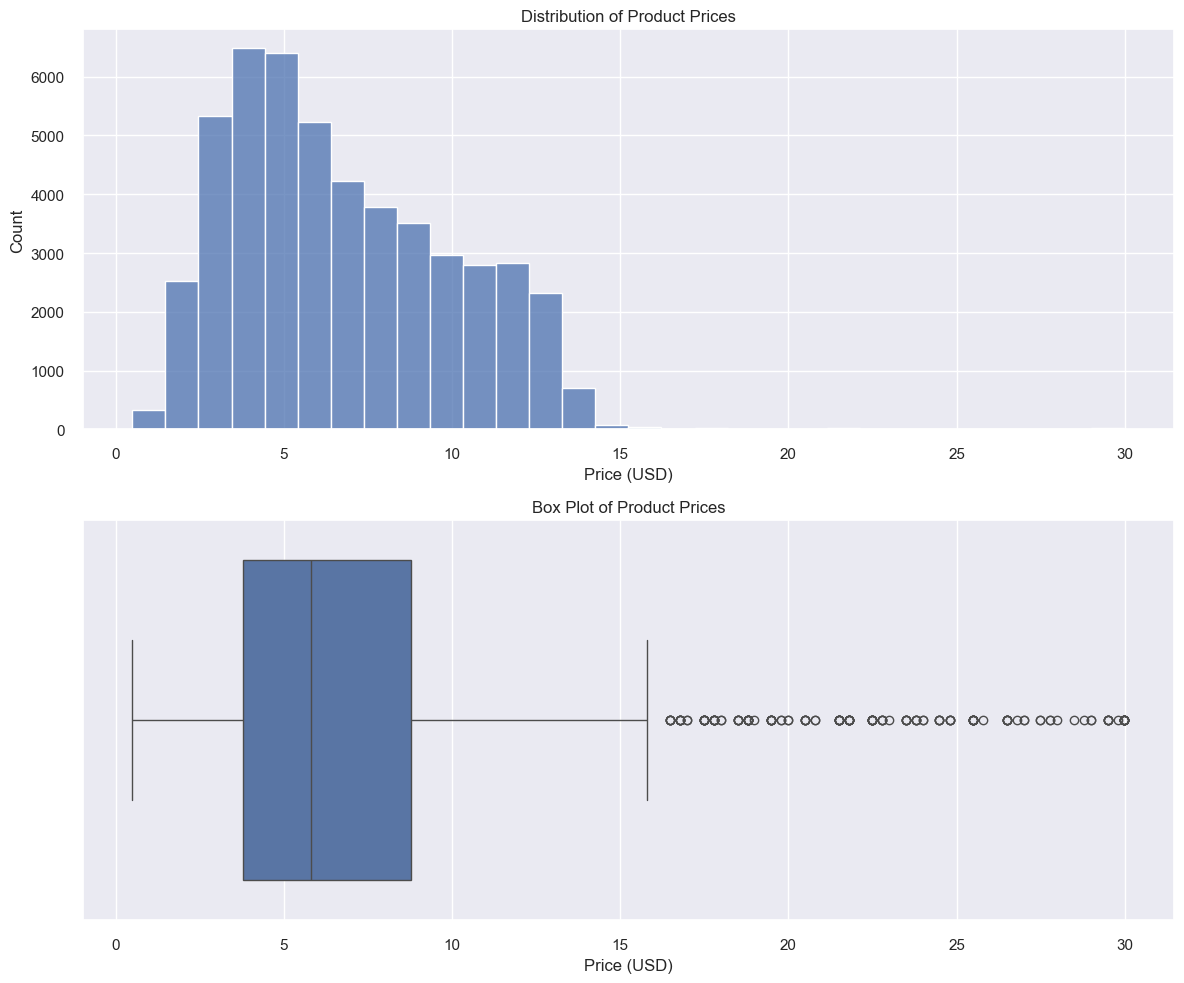


Price Statistics:
count    49688.000000
mean         6.492906
std          3.404543
min          0.490000
25%          3.790000
50%          5.790000
75%          8.790000
max         29.990000
Name: Price (USD), dtype: float64


In [17]:
# Create subplots for histogram and box plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Histogram of prices
sns.histplot(data=df, x='Price (USD)', bins=30, ax=ax1)
ax1.set_title('Distribution of Product Prices')
ax1.set_xlabel('Price (USD)')
ax1.set_ylabel('Count')

# Box plot of prices
sns.boxplot(data=df, x='Price (USD)', ax=ax2)
ax2.set_title('Box Plot of Product Prices')
ax2.set_xlabel('Price (USD)')

plt.tight_layout()
plt.show()

# Print basic statistics
print("\nPrice Statistics:")
print(df['Price (USD)'].describe())

## Product Price Comparison

Let's compare prices across different products and visualize the top most expensive and least expensive products.

/var/folders/tg/mjfrsnsd0h94zyyk61vbc3_80000gn/T/ipykernel_68632/4240337122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_expensive, x='Price (USD)', y='product_name', ax=ax1, palette='Reds_r')
/var/folders/tg/mjfrsnsd0h94zyyk61vbc3_80000gn/T/ipykernel_68632/4240337122.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_cheapest, x='Price (USD)', y='product_name', ax=ax2, palette='Blues_r')


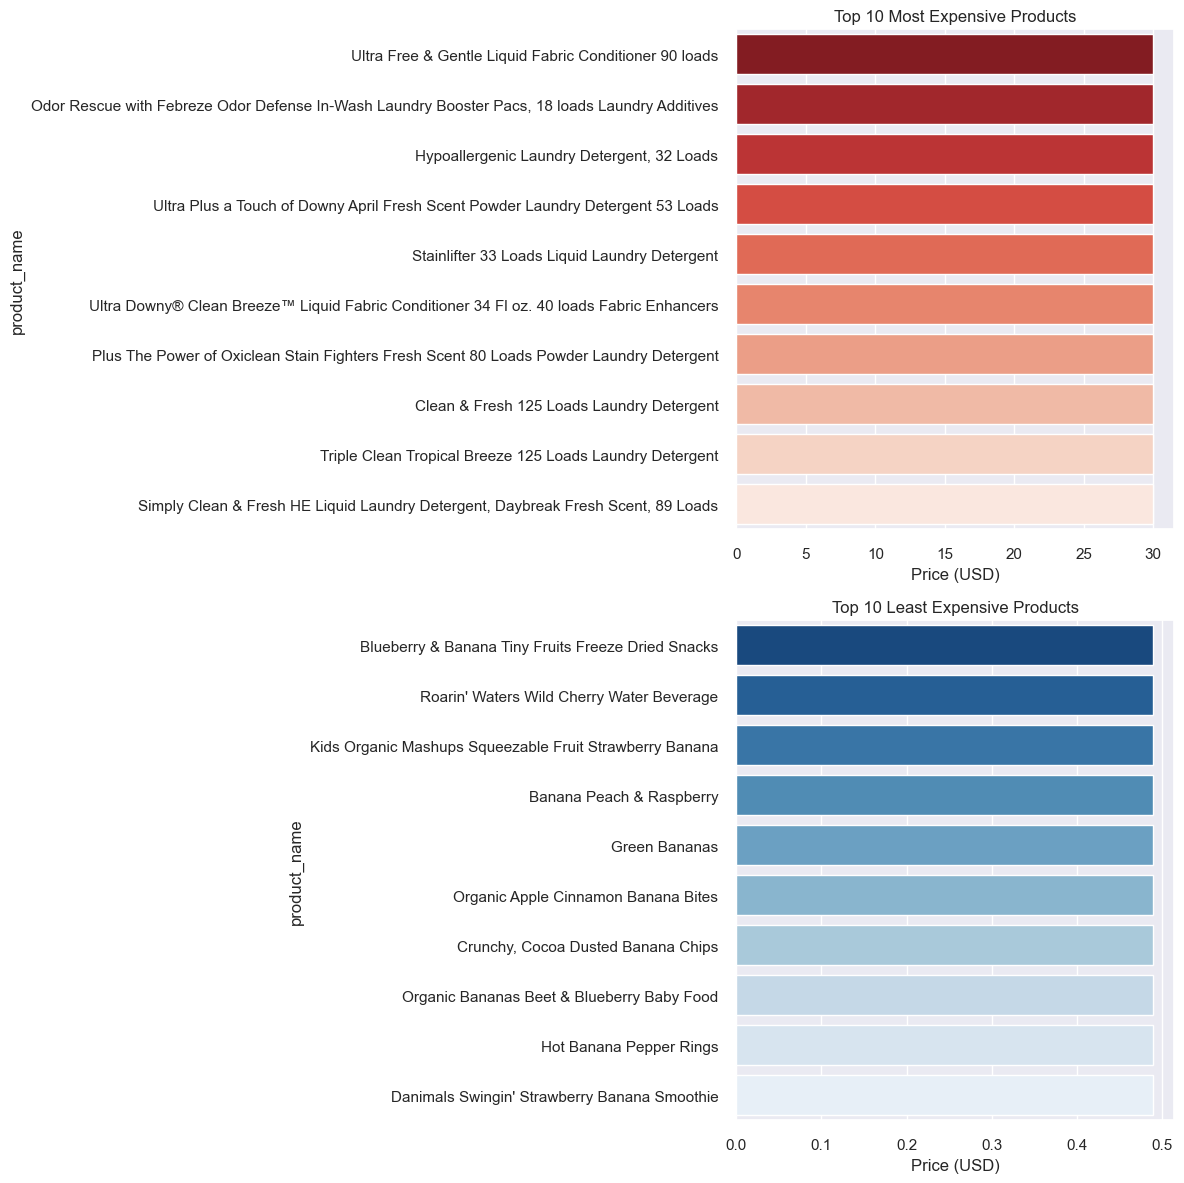

In [18]:
# Get top 10 most expensive and least expensive products
top_10_expensive = df.nlargest(10, 'Price (USD)')[['product_name', 'Price (USD)']]
top_10_cheapest = df.nsmallest(10, 'Price (USD)')[['product_name', 'Price (USD)']]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot most expensive products
sns.barplot(data=top_10_expensive, x='Price (USD)', y='product_name', ax=ax1, palette='Reds_r')
ax1.set_title('Top 10 Most Expensive Products')
ax1.set_xlabel('Price (USD)')

# Plot least expensive products
sns.barplot(data=top_10_cheapest, x='Price (USD)', y='product_name', ax=ax2, palette='Blues_r')
ax2.set_title('Top 10 Least Expensive Products')
ax2.set_xlabel('Price (USD)')

plt.tight_layout()
plt.show()

In [19]:
# Examining the ingredients column
print("Sample of raw Ingredients data:")
print(df['Ingredients'].head())
print("\nIngredients column dtype:", df['Ingredients'].dtype)
print("\nUnique values in Ingredients column:")
print(df['Ingredients'].unique())

Sample of raw Ingredients data:
0    carbonated water, high fructose corn syrup, ph...
1                          water, natural flavor, salt
2                                 tea, natural flavors
3    tomatoes, tomato puree, olive oil, salt, black...
4    tomatoes, tomato puree, olive oil, salt, garli...
Name: Ingredients, dtype: object

Ingredients column dtype: object

Unique values in Ingredients column:
['carbonated water, high fructose corn syrup, phosphoric acid, natural flavors, caffeine, caramel color'
 'water, natural flavor, salt' 'tea, natural flavors' ...
 'enriched wheat flour (wheat flour, niacin, reduced iron, thiamin mononitrate, riboflavin, folic acid), water, yeast, sugar, salt, vegetable oil (canola or soybean), calcium propionate (to preserve freshness), malted barley flour, datem, vinegar, monoglycerides, dough conditioners (ascorbic acid, enzymes), wheat gluten, soy lecithin'
 'wheat flour, sugar, palm oil, eggs, cocoa (in chocolate varieties), salt, leavening (b

## Ingredients vs Price Analysis

Let's analyze the relationship between the number of ingredients and product prices.

Top 10 most frequent ingredients:
salt                40176
water               32357
natural flavor      31837
milk                 3830
natural flavors      3269
calcium chloride     3052
sugar                2623
starter cultures     2425
annatto (color)      2425
enzymes              2425
Name: count, dtype: int64

salt:
Average price with ingredient: $6.93 (n=39631)
Average price without ingredient: $4.77 (n=10057)
Price difference: $2.16

water:
Average price with ingredient: $7.29 (n=32357)
Average price without ingredient: $5.01 (n=17331)
Price difference: $2.28

natural flavor:
Average price with ingredient: $7.06 (n=31837)
Average price without ingredient: $5.48 (n=17851)
Price difference: $1.59

milk:
Average price with ingredient: $5.74 (n=3830)
Average price without ingredient: $6.56 (n=45858)
Price difference: $-0.82

natural flavors:
Average price with ingredient: $4.95 (n=3269)
Average price without ingredient: $6.60 (n=46419)
Price difference: $-1.66

calcium chloride:

<Figure size 1500x800 with 0 Axes>

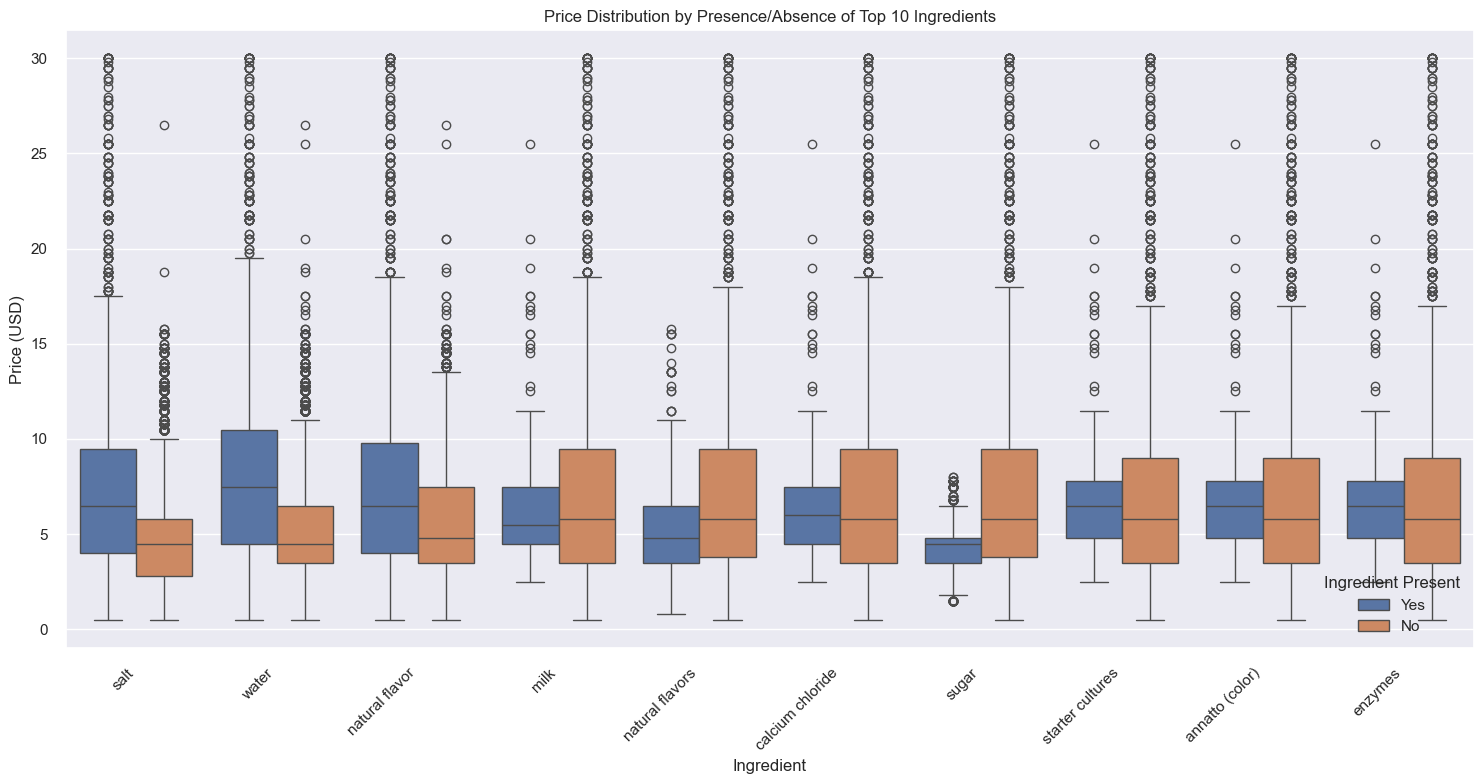

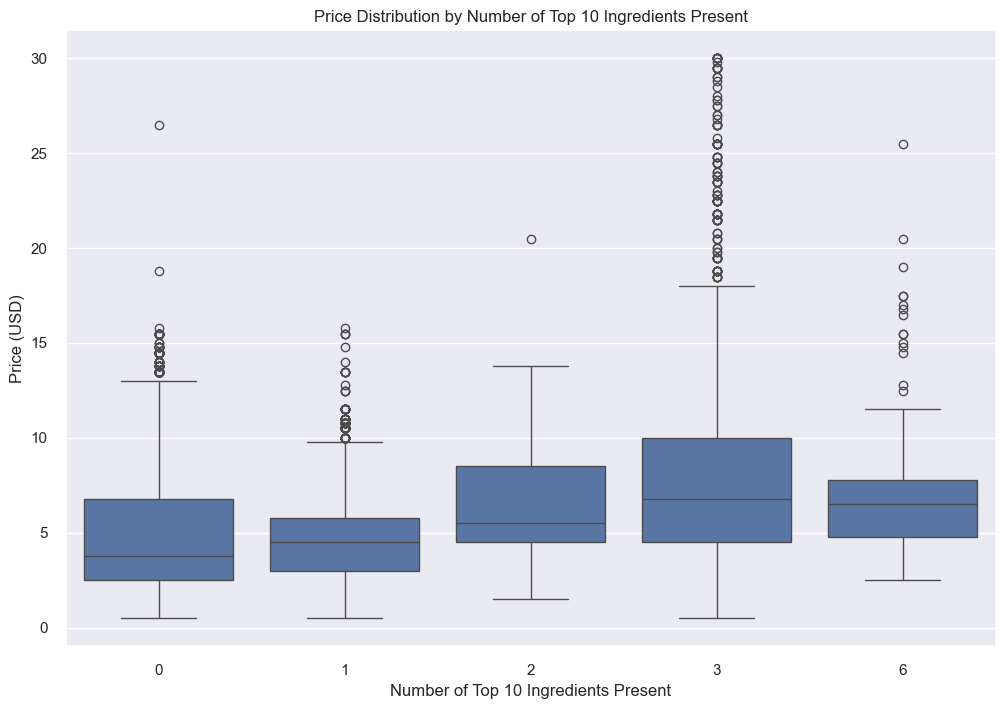


Correlation between number of top ingredients and price: 0.214


In [20]:
# Function to split ingredients into a list
def split_ingredients(x):
    if pd.isna(x):
        return []
    return [ing.strip() for ing in str(x).split(',')]

# Get ingredients as lists
df['ingredient_list'] = df['Ingredients'].apply(split_ingredients)

# Get all ingredients and their frequencies
all_ingredients = []
for ingredients in df['ingredient_list']:
    all_ingredients.extend(ingredients)

ingredient_freq = pd.Series(all_ingredients).value_counts()
top_10_ingredients = ingredient_freq.head(10)

print("Top 10 most frequent ingredients:")
print(top_10_ingredients)

# Create a DataFrame for analysis
analysis_df = pd.DataFrame()

# For each top ingredient, create a boolean column indicating its presence
for ingredient in top_10_ingredients.index:
    analysis_df[f'has_{ingredient}'] = df['ingredient_list'].apply(lambda x: ingredient in x)

# Add price column
analysis_df['Price (USD)'] = df['Price (USD)']

# Create a figure for price comparisons
plt.figure(figsize=(15, 8))

# Prepare data for visualization
plot_data = []
for ingredient in top_10_ingredients.index:
    # Get prices for products with and without the ingredient
    prices_with = analysis_df[analysis_df[f'has_{ingredient}']]['Price (USD)']
    prices_without = analysis_df[~analysis_df[f'has_{ingredient}']]['Price (USD)']
    
    # Calculate statistics
    mean_with = prices_with.mean()
    mean_without = prices_without.mean()
    n_with = len(prices_with)
    n_without = len(prices_without)
    
    # Print statistics
    print(f"\n{ingredient}:")
    print(f"Average price with ingredient: ${mean_with:.2f} (n={n_with})")
    print(f"Average price without ingredient: ${mean_without:.2f} (n={n_without})")
    print(f"Price difference: ${(mean_with - mean_without):.2f}")
    
    # Add data for plotting
    for price in prices_with:
        plot_data.append({'Ingredient': ingredient, 'Price': price, 'Present': 'Yes'})
    for price in prices_without:
        plot_data.append({'Ingredient': ingredient, 'Price': price, 'Present': 'No'})

# Convert to DataFrame for plotting
plot_df = pd.DataFrame(plot_data)

# Create box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=plot_df, x='Ingredient', y='Price', hue='Present')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Presence/Absence of Top 10 Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Price (USD)')
plt.legend(title='Ingredient Present')
plt.tight_layout()
plt.show()

# Create visualization for number of top ingredients
analysis_df['num_top_ingredients'] = analysis_df[[f'has_{ing}' for ing in top_10_ingredients.index]].sum(axis=1)

plt.figure(figsize=(12, 8))
sns.boxplot(data=analysis_df, x='num_top_ingredients', y='Price (USD)')
plt.title('Price Distribution by Number of Top 10 Ingredients Present')
plt.xlabel('Number of Top 10 Ingredients Present')
plt.ylabel('Price (USD)')
plt.show()

# Calculate correlation between number of top ingredients and price
correlation = analysis_df['num_top_ingredients'].corr(analysis_df['Price (USD)'])
print(f"\nCorrelation between number of top ingredients and price: {correlation:.3f}")

## Interactive Price Analysis

Let's create an interactive visualization that allows us to explore the relationship between prices and other features.

## Product Substitution Analysis

Let's analyze various features to determine product similarity for substitution recommendations:
1. Price Range Analysis
2. Ingredient Similarity Analysis
3. Nutritional Profile Clustering
4. Feature Correlation Analysis
5. Product Category Distribution

Price Band Statistics:
            count   mean   std   min    max
price_band                                 
Very Low    12358   2.66  0.74  0.49   3.49
Low          8269   4.38  0.36  3.79   4.79
Medium       9691   5.98  0.54  4.99   6.79
High        10012   8.45  0.81  6.99   9.79
Very High    9358  11.85  1.81  9.99  29.99


/var/folders/tg/mjfrsnsd0h94zyyk61vbc3_80000gn/T/ipykernel_64501/756053573.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_stats = df.groupby('price_band')['Price (USD)'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)


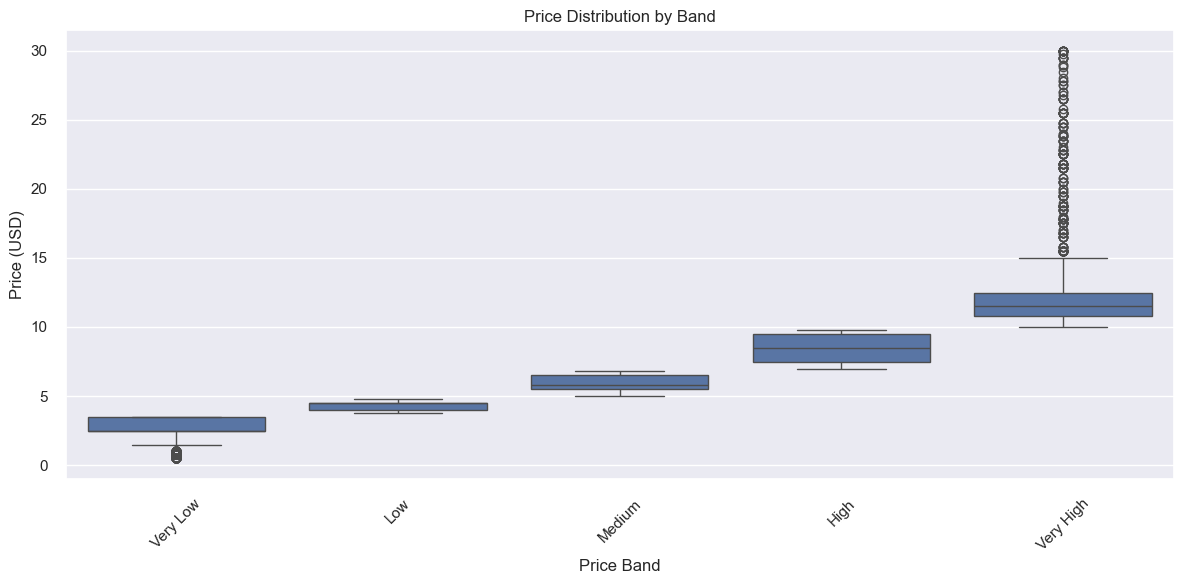


Example - For product priced at $4.49:
Number of products in similar price range: 8700
Price range: $3.79 - $4.99


## Additional Ingredient Analysis

Let's explore more relationships between ingredients and prices through various visualizations:
1. Ingredient co-occurrence patterns
2. Price trends by ingredient combinations
3. Ingredient frequency distribution
4. Price impact visualization
5. Statistical significance of price differences

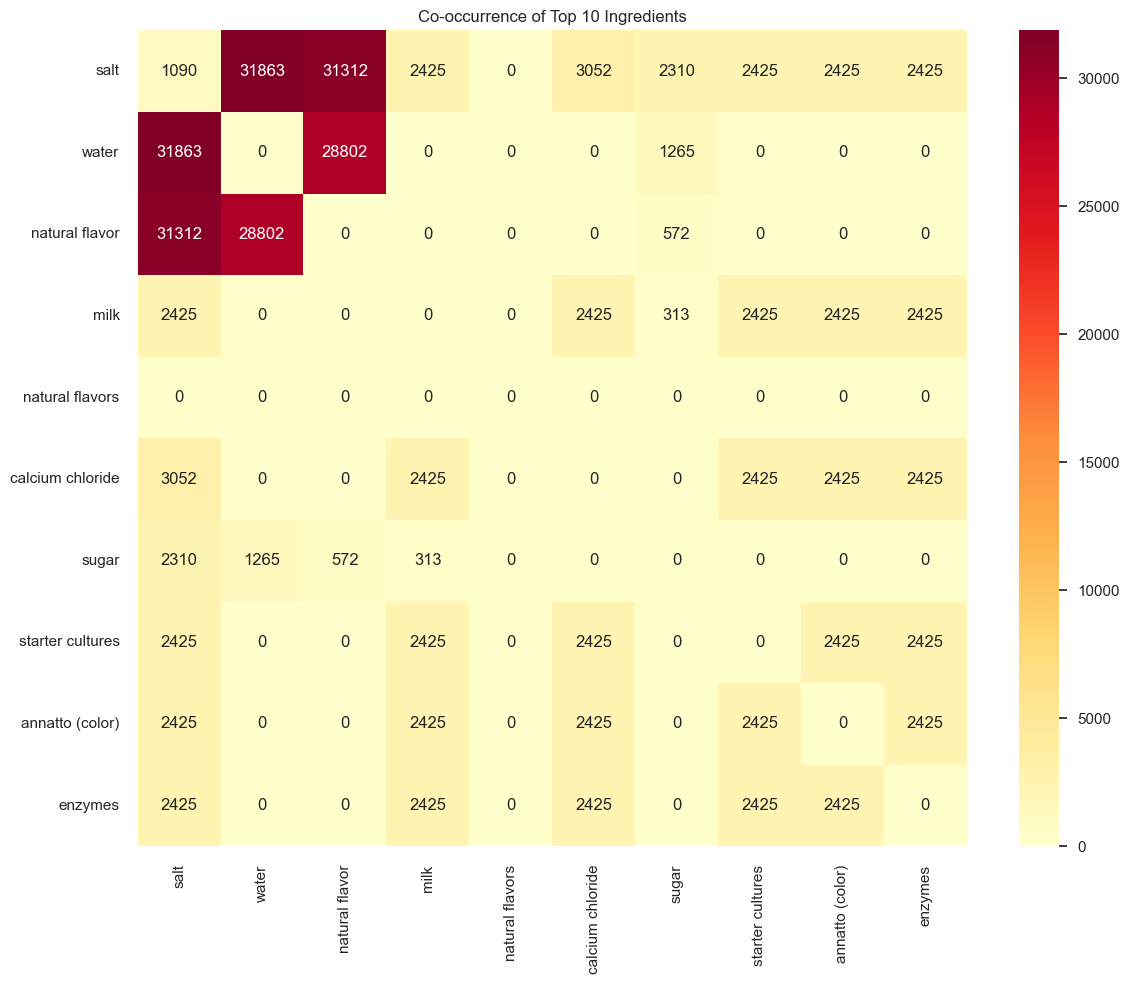

In [21]:
# 1. Ingredient Co-occurrence Analysis
from itertools import combinations

# Create co-occurrence matrix for top ingredients
co_occurrence = pd.DataFrame(0, 
                           index=top_10_ingredients.index, 
                           columns=top_10_ingredients.index)

for ingredients in df['ingredient_list']:
    # Get pairs of ingredients that are in top 10
    pairs = list(combinations([ing for ing in ingredients if ing in top_10_ingredients.index], 2))
    for ing1, ing2 in pairs:
        co_occurrence.loc[ing1, ing2] += 1
        co_occurrence.loc[ing2, ing1] += 1

# Plot co-occurrence heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Co-occurrence of Top 10 Ingredients')
plt.tight_layout()
plt.show()



<Figure size 1200x600 with 0 Axes>

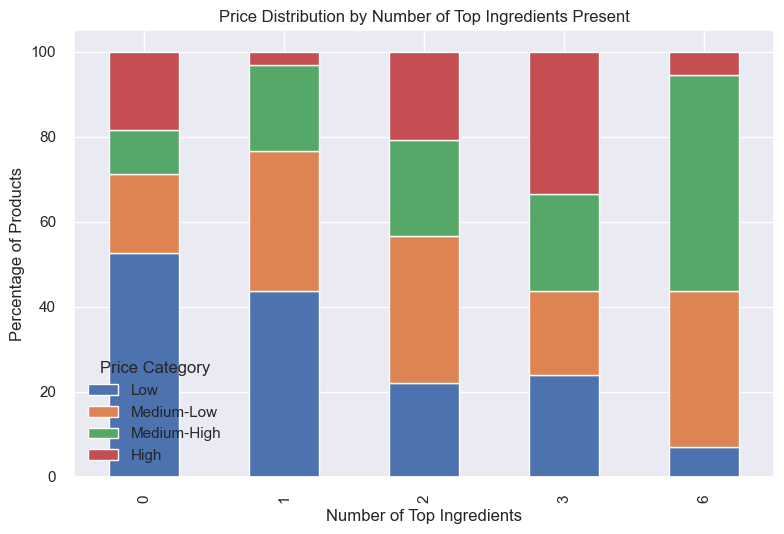

In [22]:
# 2. Price Distribution by Ingredient Combinations
# Get products with multiple top ingredients
analysis_df['top_ingredients_count'] = analysis_df[[f'has_{ing}' for ing in top_10_ingredients.index]].sum(axis=1)
analysis_df['price_category'] = pd.qcut(analysis_df['Price (USD)'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
ingredient_counts = pd.crosstab(analysis_df['top_ingredients_count'], analysis_df['price_category'], normalize='index') * 100
ingredient_counts.plot(kind='bar', stacked=True)
plt.title('Price Distribution by Number of Top Ingredients Present')
plt.xlabel('Number of Top Ingredients')
plt.ylabel('Percentage of Products')
plt.legend(title='Price Category')
plt.tight_layout()
plt.show()

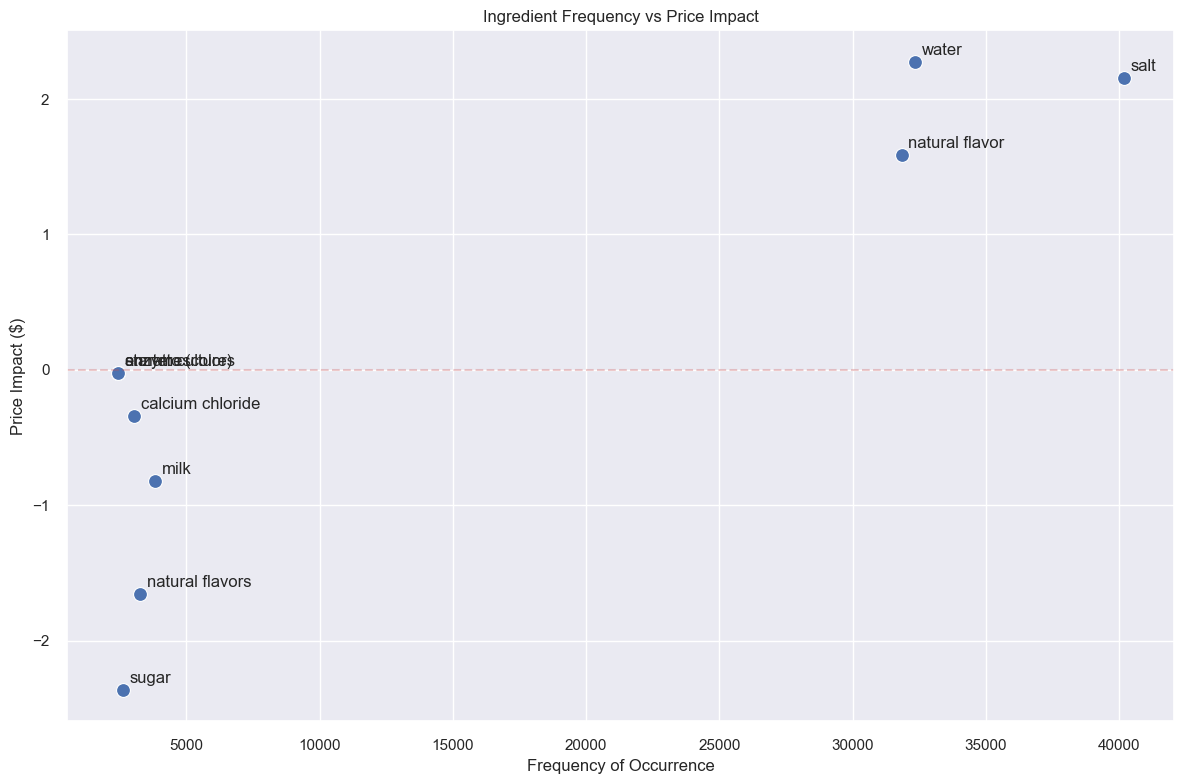

In [23]:
# 3. Ingredient Frequency Distribution with Price Impact
# Calculate average price impact for each ingredient
price_impacts = []
for ingredient in top_10_ingredients.index:
    prices_with = analysis_df[analysis_df[f'has_{ingredient}']]['Price (USD)'].mean()
    prices_without = analysis_df[~analysis_df[f'has_{ingredient}']]['Price (USD)'].mean()
    price_impact = prices_with - prices_without
    price_impacts.append({'ingredient': ingredient, 
                         'frequency': top_10_ingredients[ingredient],
                         'price_impact': price_impact})

impact_df = pd.DataFrame(price_impacts)

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=impact_df, x='frequency', y='price_impact', s=100)
for i, row in impact_df.iterrows():
    plt.annotate(row['ingredient'], 
                (row['frequency'], row['price_impact']),
                xytext=(5, 5), textcoords='offset points')
plt.title('Ingredient Frequency vs Price Impact')
plt.xlabel('Frequency of Occurrence')
plt.ylabel('Price Impact ($)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

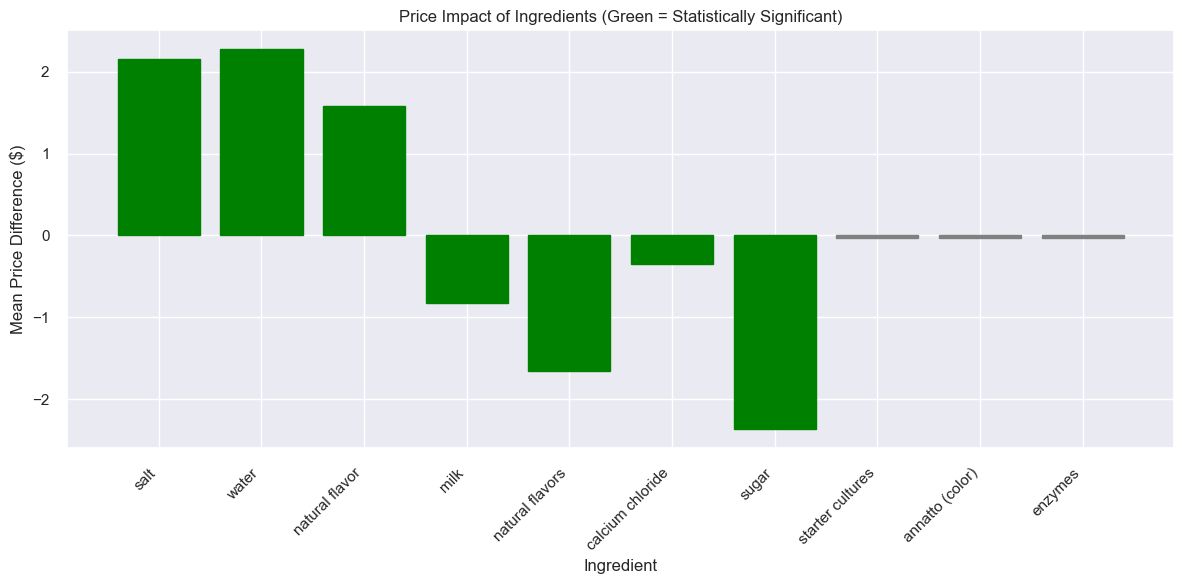


Statistical Summary:

salt:
Price Impact: $2.16
P-value: 0.0000 (Significant)

water:
Price Impact: $2.28
P-value: 0.0000 (Significant)

natural flavor:
Price Impact: $1.59
P-value: 0.0000 (Significant)

milk:
Price Impact: $-0.82
P-value: 0.0000 (Significant)

natural flavors:
Price Impact: $-1.66
P-value: 0.0000 (Significant)

calcium chloride:
Price Impact: $-0.34
P-value: 0.0000 (Significant)

sugar:
Price Impact: $-2.37
P-value: 0.0000 (Significant)

starter cultures:
Price Impact: $-0.03
P-value: 0.7226 (Not significant)

annatto (color):
Price Impact: $-0.03
P-value: 0.7226 (Not significant)

enzymes:
Price Impact: $-0.03
P-value: 0.7226 (Not significant)


In [24]:
!pip3 install scipy
# 4. Statistical Analysis of Price Differences
from scipy import stats

# Perform t-tests for each ingredient
statistical_tests = []
for ingredient in top_10_ingredients.index:
    prices_with = analysis_df[analysis_df[f'has_{ingredient}']]['Price (USD)']
    prices_without = analysis_df[~analysis_df[f'has_{ingredient}']]['Price (USD)']
    t_stat, p_value = stats.ttest_ind(prices_with, prices_without)
    statistical_tests.append({
        'ingredient': ingredient,
        't_statistic': t_stat,
        'p_value': p_value,
        'mean_diff': prices_with.mean() - prices_without.mean()
    })

test_df = pd.DataFrame(statistical_tests)
test_df['significant'] = test_df['p_value'] < 0.05

# Create significance plot
plt.figure(figsize=(12, 6))
bars = plt.bar(test_df['ingredient'], test_df['mean_diff'])
for i, bar in enumerate(bars):
    color = 'green' if test_df.iloc[i]['significant'] else 'gray'
    bar.set_color(color)
plt.xticks(rotation=45, ha='right')
plt.title('Price Impact of Ingredients (Green = Statistically Significant)')
plt.xlabel('Ingredient')
plt.ylabel('Mean Price Difference ($)')
plt.tight_layout()
plt.show()

# Print statistical summary
print("\nStatistical Summary:")
for _, row in test_df.iterrows():
    sig_status = "Significant" if row['significant'] else "Not significant"
    print(f"\n{row['ingredient']}:")
    print(f"Price Impact: ${row['mean_diff']:.2f}")
    print(f"P-value: {row['p_value']:.4f} ({sig_status})")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   Price (USD)             float64
 8   Ingredients             object 
 9   Calories                int64  
 10  Carbs (g)               float64
 11  Protein (g)             float64
 12  Fat (g)                 float64
 13  Sugar Added (g)         float64
 14  Sugar Natural (g)       float64
 15  user_id                 int64  
 16  eval_set                object 
 17  order_number            int64  
 18  order_dow               int64  
 19  order_hour_of_day       int64  
 20  days_since_prior_order  float64
dtypes: float64(7), int64(11), obj

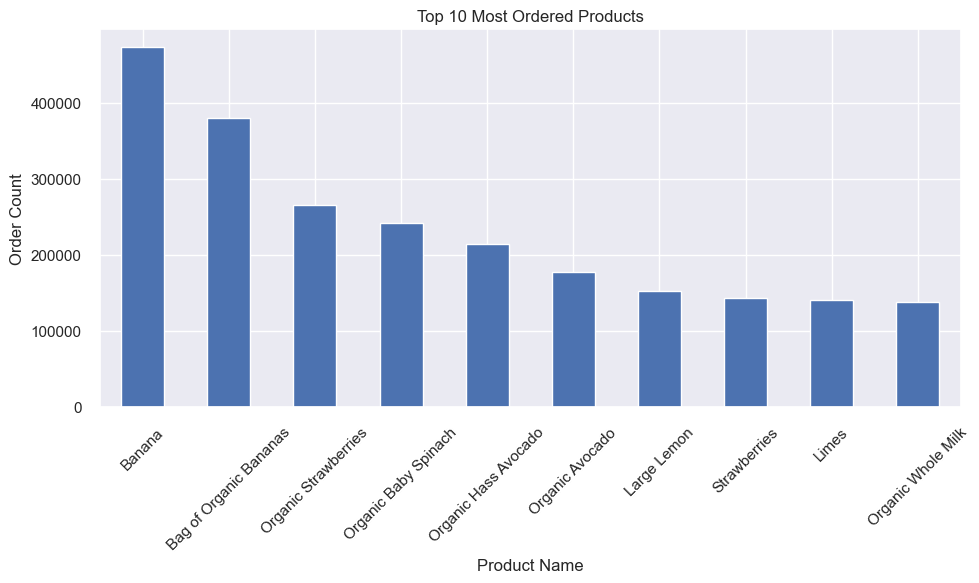

In [28]:
import pandas as pd

# Load the data
products_df = pd.read_csv('../data/raw/products_with_prices_ingredients_nutrition.csv')
orders_df = pd.read_csv('../data/raw/orders.csv')
order_products_prior_df = pd.read_csv('../data/raw/order_products__prior.csv')

# Merge order_products_prior with products to get product details for each order
order_details_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')

# Merge with orders to get order details
full_df = pd.merge(order_details_df, orders_df, on='order_id', how='left')

# EDA examples:
print(full_df.info())
print(full_df.head())

# Most ordered products
most_ordered = full_df['product_name'].value_counts().head(10)
print("Most ordered products:")
print(most_ordered)

# Orders per user
orders_per_user = full_df.groupby('user_id')['order_id'].nunique().sort_values(ascending=False)
print("Orders per user:")
print(orders_per_user.head())

# Product reorder rate
reorder_rate = full_df.groupby('product_name')['reordered'].mean().sort_values(ascending=False)
print("Product reorder rate:")
print(reorder_rate.head())

# Visualization: Top 10 most ordered products
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
most_ordered.plot(kind='bar')
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Price Band Statistics:
            count   mean   std   min    max
price_band                                 
Very Low    12358   2.66  0.74  0.49   3.49
Low          8269   4.38  0.36  3.79   4.79
Medium       9691   5.98  0.54  4.99   6.79
High        10012   8.45  0.81  6.99   9.79
Very High    9358  11.85  1.81  9.99  29.99


/var/folders/tg/mjfrsnsd0h94zyyk61vbc3_80000gn/T/ipykernel_68632/756053573.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_stats = df.groupby('price_band')['Price (USD)'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)


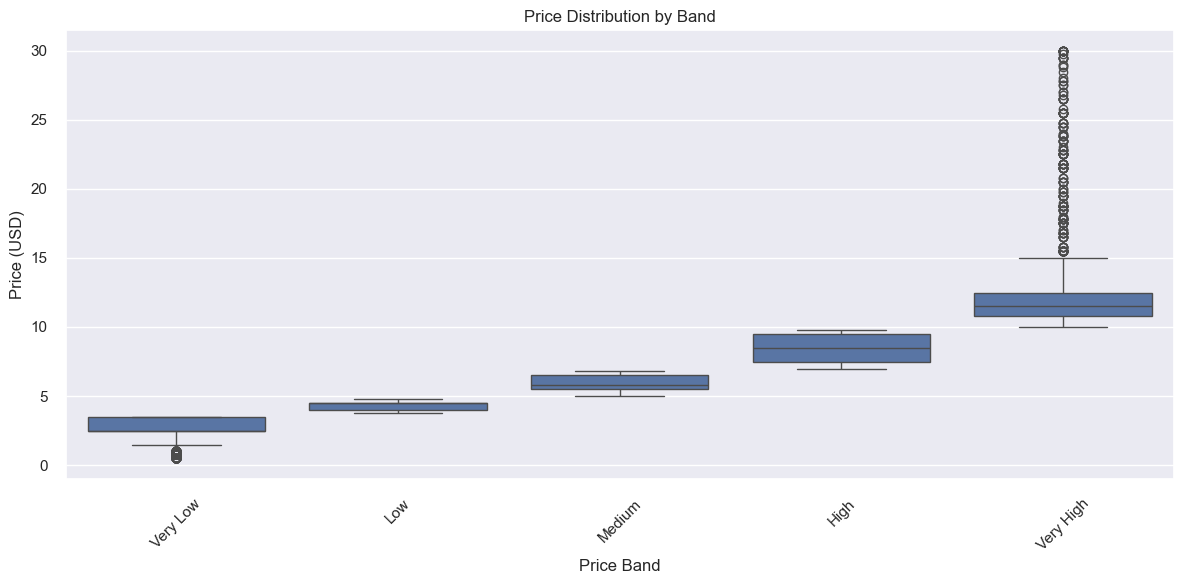


Example - For product priced at $4.49:
Number of products in similar price range: 8700
Price range: $3.79 - $4.99


ModuleNotFoundError: No module named 'sklearn'

In [25]:
# 1. Price Range Analysis

# Create price bands for similarity analysis
df['price_band'] = pd.qcut(df['Price (USD)'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Calculate price statistics by band
price_stats = df.groupby('price_band')['Price (USD)'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
print("Price Band Statistics:")
print(price_stats)

# Visualize price band distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='price_band', y='Price (USD)')
plt.title('Price Distribution by Band')
plt.xlabel('Price Band')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate acceptable price ranges for substitution
df['price_lower_bound'] = df['Price (USD)'] * 0.8  # 20% below
df['price_upper_bound'] = df['Price (USD)'] * 1.2  # 20% above

# Example of price range overlap analysis for a sample product
sample_product = df.sample(n=1, random_state=42)
similar_price_products = df[
    (df['Price (USD)'] >= sample_product['price_lower_bound'].iloc[0]) &
    (df['Price (USD)'] <= sample_product['price_upper_bound'].iloc[0])
]

print(f"\nExample - For product priced at ${sample_product['Price (USD)'].iloc[0]:.2f}:")
print(f"Number of products in similar price range: {len(similar_price_products)}")
print(f"Price range: ${similar_price_products['Price (USD)'].min():.2f} - ${similar_price_products['Price (USD)'].max():.2f}")

# 2. Ingredient Similarity Analysis

# Calculate Jaccard similarity for ingredients
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert ingredient lists to strings for vectorization
df['ingredients_str'] = df['ingredient_list'].apply(lambda x: ' '.join(x))

# Create ingredient vectors
vectorizer = CountVectorizer(binary=True)
ingredient_matrix = vectorizer.fit_transform(df['ingredients_str'])

# Calculate ingredient similarity matrix
ingredient_similarity = cosine_similarity(ingredient_matrix)

# Analyze similarity distribution
similarity_dist = ingredient_similarity[np.triu_indices(len(ingredient_similarity), k=1)]

plt.figure(figsize=(10, 6))
sns.histplot(similarity_dist, bins=50)
plt.title('Distribution of Ingredient Similarity Scores')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Count')
plt.show()

print("\nIngredient Similarity Statistics:")
print(f"Average similarity score: {similarity_dist.mean():.3f}")
print(f"Median similarity score: {np.median(similarity_dist):.3f}")
print(f"90th percentile similarity: {np.percentile(similarity_dist, 90):.3f}")

# 3. Feature Importance Analysis

# Get numerical columns (assuming these are nutritional values)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col not in ['Price (USD)', 'price_lower_bound', 'price_upper_bound']]

if len(numerical_cols) > 0:
    # Calculate correlation with price
    correlations = df[numerical_cols + ['Price (USD)']].corr()['Price (USD)'].sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    correlations.plot(kind='bar')
    plt.title('Feature Correlations with Price')
    plt.xlabel('Features')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print top correlations
    print("\nTop feature correlations with price:")
    print(correlations)

# 4. Similarity Score Distribution

def calculate_product_similarity(prod1, prod2):
    """Calculate similarity score between two products based on multiple features"""
    scores = []
    
    # Price similarity (inverse of normalized difference)
    price_diff = abs(prod1['Price (USD)'] - prod2['Price (USD)']) / max(prod1['Price (USD)'], prod2['Price (USD)'])
    price_similarity = 1 - price_diff
    scores.append(price_similarity)
    
    # Ingredient similarity (Jaccard similarity)
    common_ingredients = len(set(prod1['ingredient_list']) & set(prod2['ingredient_list']))
    total_ingredients = len(set(prod1['ingredient_list']) | set(prod2['ingredient_list']))
    ingredient_similarity = common_ingredients / total_ingredients if total_ingredients > 0 else 0
    scores.append(ingredient_similarity)
    
    return np.mean(scores)

# Calculate similarity scores for a sample product
sample_idx = df.sample(n=1, random_state=42).index[0]
sample_product = df.loc[sample_idx]
similarity_scores = []

for idx, row in df.iterrows():
    if idx != sample_idx:
        similarity = calculate_product_similarity(sample_product, row)
        similarity_scores.append({'product': row['product_name'], 'similarity': similarity})

similarity_df = pd.DataFrame(similarity_scores)
similarity_df = similarity_df.sort_values('similarity', ascending=False)

# Plot similarity score distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=similarity_df, x='similarity', bins=30)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Count')
plt.show()

# Print top similar products
print("\nTop 5 Most Similar Products:")
print(similarity_df.head())